<a href="https://colab.research.google.com/github/delToros/Automation_ChatGPT/blob/master/Space_Missions_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

<center><img src="https://i.imgur.com/9hLRsjZ.jpg" height=400></center>

This dataset was scraped from [nextspaceflight.com](https://nextspaceflight.com/launches/past/?page=1) and includes all the space missions since the beginning of Space Race between the USA and the Soviet Union in 1957!

### Install Package with Country Codes

In [1]:
%pip install iso3166

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### Upgrade Plotly

Run the cell below if you are working with Google Colab.

In [2]:
%pip install --upgrade plotly

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
%pip install dataprep

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 16.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 69.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 763.4/763.4 KB 57.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.6/133.6 KB 15.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 53.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 32.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 48.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 21.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.2/114.2 KB 11.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.8/158.8 KB 14.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 264.6/264.6 KB 20.

### Import Statements

In [5]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import iso3166

from dataprep.clean import clean_country
import matplotlib.dates as mdates

# These might be helpful:
# from iso3166 import countries, countries_by_name
from datetime import datetime, timedelta

### Notebook Presentation

In [6]:
pd.options.display.float_format = '{:,.2f}'.format

### Load the Data

In [8]:
df_data = pd.read_csv('mission_launches_updated.csv', parse_dates=['Datetime'])

# Preliminary Data Exploration

* What is the shape of `df_data`? 
* How many rows and columns does it have?
* What are the column names?
* Are there any NaN values or duplicates?

In [9]:
f'The shape of the data is {df_data.shape}'

'The shape of the data is (6492, 8)'

Data head

In [10]:
df_data.head()

,Unnamed: 0,Organisation,Location,Datetime,Details,Status,Price,Mission_status
0,0,SpaceX,"SLC-40, Cape Canaveral SFS, Florida, USA",2023-03-17 23:38:00+00:00,Falcon 9 Block 5 | SES-18 & SES-19,Active,67.00,Success
1,1,SpaceX,"SLC-4E, Vandenberg SFB, California, USA",2023-03-17 19:26:00+00:00,Falcon 9 Block 5 | Starlink Group 2-8,Active,67.00,Success
2,2,CASC,"LC-2, Xichang Satellite Launch Center, China",2023-03-17 08:33:00+00:00,Long March 3B/E | Gaofen-13-02,Active,29.15,Success
3,3,Rocket Lab,"Rocket Lab LC-2 (LP-0C), Wallops Flight Facili...",2023-03-16 22:38:00+00:00,Electron/Curie | Stronger Together,Active,7.50,Success
4,4,CASC,"Site 95, Jiuquan Satellite Launch Center, China",2023-03-15 11:41:00+00:00,Long March 11 | Shiyan 19,Active,5.30,Success


Data tail

In [11]:
df_data.tail()

,Unnamed: 0,Organisation,Location,Datetime,Details,Status,Price,Mission_status
6487,6487,US Navy,"LC-18A, Cape Canaveral SFS, Florida, USA",1958-02-05 07:33:00+00:00,Vanguard | Vanguard TV3BU,Retired,NaN,Failure
6488,6488,ABMA,"LC-26A, Cape Canaveral SFS, Florida, USA",1958-02-01 03:47:00+00:00,Juno I | Explorer 1,Retired,NaN,Success
6489,6489,US Navy,"LC-18A, Cape Canaveral SFS, Florida, USA",1957-12-06 16:44:00+00:00,Vanguard | Vanguard TV3,Retired,NaN,Failure
6490,6490,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",1957-11-03 02:30:00+00:00,Sputnik 8K71PS | Sputnik 2,Retired,NaN,Success
6491,6491,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",1957-10-04 19:28:00+00:00,Sputnik 8K71PS | Sputnik 1,Retired,NaN,Success


Info about columns

In [12]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6492 entries, 0 to 6491
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      6492 non-null   int64  
 1   Organisation    6492 non-null   object 
 2   Location        6492 non-null   object 
 3   Datetime        6492 non-null   object 
 4   Details         6492 non-null   object 
 5   Status          6492 non-null   object 
 6   Price           2461 non-null   float64
 7   Mission_status  6492 non-null   object 
dtypes: float64(1), int64(1), object(6)
memory usage: 405.9+ KB


Checking for NA data

In [13]:
print(f'Any NaN values? {df_data.isna().values.any()}')

Any NaN values? True


Checking for duplicates

In [14]:
print(f'Any duplicates? {df_data.duplicated().values.any()}')

Any duplicates? False


Check NaN by column

In [15]:
df_data.isna().sum()

Unnamed: 0           0
Organisation         0
Location             0
Datetime             0
Details              0
Status               0
Price             4031
Mission_status       0
dtype: int64

In [16]:
print('Since we still can look at available data about price, we decided to keep this column')

Since we still can look at available data about price, we decided to keep this column


## Tiding up columns
make columns more friendly for upcoming data digging

Create several columns out of location column

## Data Cleaning - Check for Missing Values and Duplicates

Consider removing columns containing junk data. 

In [17]:
print('First column do not comntain any signigicant data, so we will delet it')

First column do not comntain any signigicant data, so we will delet it


In [18]:
df_data.drop(columns=['Unnamed: 0'])

,Organisation,Location,Datetime,Details,Status,Price,Mission_status
0,SpaceX,"SLC-40, Cape Canaveral SFS, Florida, USA",2023-03-17 23:38:00+00:00,Falcon 9 Block 5 | SES-18 & SES-19,Active,67.00,Success
1,SpaceX,"SLC-4E, Vandenberg SFB, California, USA",2023-03-17 19:26:00+00:00,Falcon 9 Block 5 | Starlink Group 2-8,Active,67.00,Success
2,CASC,"LC-2, Xichang Satellite Launch Center, China",2023-03-17 08:33:00+00:00,Long March 3B/E | Gaofen-13-02,Active,29.15,Success
3,Rocket Lab,"Rocket Lab LC-2 (LP-0C), Wallops Flight Facili...",2023-03-16 22:38:00+00:00,Electron/Curie | Stronger Together,Active,7.50,Success
4,CASC,"Site 95, Jiuquan Satellite Launch Center, China",2023-03-15 11:41:00+00:00,Long March 11 | Shiyan 19,Active,5.30,Success
...,...,...,...,...,...,...,...
6487,US Navy,"LC-18A, Cape Canaveral SFS, Florida, USA",1958-02-05 07:33:00+00:00,Vanguard | Vanguard TV3BU,Retired,NaN,Failure
6488,ABMA,"LC-26A, Cape Canaveral SFS, Florida, USA",1958-02-01 03:47:00+00:00,Juno I | Explorer 1,Retired,NaN,Success
6489,US Navy,"LC-18A, Cape Canaveral SFS, Florida, USA",1957-12-06 16:44:00+00:00,Vanguard | Vanguard TV3,Retired,NaN,Failure
6490,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",1957-11-03 02:30:00+00:00,Sputnik 8K71PS | Sputnik 2,Retired,NaN,Success


Making datetypeformat

In [19]:
df_data['Datetime'] = pd.to_datetime(df_data['Datetime'], utc=True)

In [20]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6492 entries, 0 to 6491
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   Unnamed: 0      6492 non-null   int64              
 1   Organisation    6492 non-null   object             
 2   Location        6492 non-null   object             
 3   Datetime        6492 non-null   datetime64[ns, UTC]
 4   Details         6492 non-null   object             
 5   Status          6492 non-null   object             
 6   Price           2461 non-null   float64            
 7   Mission_status  6492 non-null   object             
dtypes: datetime64[ns, UTC](1), float64(1), int64(1), object(5)
memory usage: 405.9+ KB


## Descriptive Statistics

In [21]:
print(f'In this data we have {df_data.shape[0]-1} entries')

In this data we have 6491 entries


In [22]:
print(f'In this data we have {df_data.Organisation.nunique()} Organisations')

In this data we have 61 Organisations


In [23]:
print(f'Time range of data: from {df_data.Datetime.min().year} to {df_data.Datetime.max().year}')

Time range of data: from 1957 to 2023


In [24]:
print(f'So for the period of {df_data.Datetime.max().year - df_data.Datetime.min().year} years we have information about {df_data.shape[0]-1} launches. In average it is {(df_data.shape[0]-1)/(df_data.Datetime.max().year - df_data.Datetime.min().year)} launches per year.')

So for the period of 66 years we have information about 6491 launches. In average it is 98.34848484848484 launches per year.


# Number of Launches per Company

Create a chart that shows the number of space mission launches by organisation.

In [25]:
launches_per_company = df_data.Organisation.value_counts()[:30]

In [26]:
launches_per_company_bar = px.bar(
    x = launches_per_company.index,
    y = launches_per_company.values,
    title = "Launcheas per company (top 30)",
    color = launches_per_company.values,
    color_continuous_scale='Aggrnyl',
)

launches_per_company_bar.update_layout(
    xaxis_title = 'Organisation',
    yaxis_title = 'Number of launches'
)

launches_per_company_bar.show()

# Number of Active versus Retired Rockets

How many rockets are active compared to those that are decomissioned? 

In [27]:
num_of_rockets = df_data.Details.nunique()

In [28]:
rockets = df_data[['Details', 'Status']].value_counts().groupby('Status').count()

In [29]:
rockets

Status
Active     1348
Retired    5084
dtype: int64

In [30]:
print(f'In this data we have info about {num_of_rockets} rockets. Out of them {(rockets[0]/num_of_rockets)*100:.4}% ({rockets[0]}) are still active, while the rest - {rockets[1]} - are retired.')

In this data we have info about 6432 rockets. Out of them 20.96% (1348) are still active, while the rest - 5084 - are retired.


In [31]:
status_by_org = df_data.groupby(['Organisation', 'Status'], as_index = False).agg({'Details': pd.Series.count})
status_by_org.sort_values('Details', ascending=False, inplace=True)

status_by_org_bar = px.bar(
    status_by_org[:30],
    title = "Rocket status per company (top 30)",
    x = 'Organisation',
    y = 'Details',
    color = 'Status',
)

status_by_org_bar.update_layout(
    xaxis_title = 'Organisation',
    yaxis_title = 'Number Rockets',
    xaxis = {'categoryorder':'total descending'}
)

# Distribution of Mission Status

How many missions were successful?
How many missions failed?

In [32]:
mission_status = df_data.Mission_status.value_counts()

In [33]:
mission_status_chart = px.pie(
    labels = mission_status.index,
    values = mission_status.values,
    title = 'Distribution of Mission Status',
    names = mission_status.index,
    color_discrete_sequence = px.colors.qualitative.Prism
)

mission_status_chart.update_traces(
    textposition = 'outside',
    textinfo = 'percent+label'
)

/usr/local/lib/python3.9/dist-packages/plotly/express/_core.py:137: FutureWarning:

Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.



# How Expensive are the Launches? 

Create a histogram and visualise the distribution. The price column is given in USD millions (careful of missing values). 

In [34]:
no_na_data = df_data.dropna()
no_na_data

,Unnamed: 0,Organisation,Location,Datetime,Details,Status,Price,Mission_status
0,0,SpaceX,"SLC-40, Cape Canaveral SFS, Florida, USA",2023-03-17 23:38:00+00:00,Falcon 9 Block 5 | SES-18 & SES-19,Active,67.00,Success
1,1,SpaceX,"SLC-4E, Vandenberg SFB, California, USA",2023-03-17 19:26:00+00:00,Falcon 9 Block 5 | Starlink Group 2-8,Active,67.00,Success
2,2,CASC,"LC-2, Xichang Satellite Launch Center, China",2023-03-17 08:33:00+00:00,Long March 3B/E | Gaofen-13-02,Active,29.15,Success
3,3,Rocket Lab,"Rocket Lab LC-2 (LP-0C), Wallops Flight Facili...",2023-03-16 22:38:00+00:00,Electron/Curie | Stronger Together,Active,7.50,Success
4,4,CASC,"Site 95, Jiuquan Satellite Launch Center, China",2023-03-15 11:41:00+00:00,Long March 11 | Shiyan 19,Active,5.30,Success
...,...,...,...,...,...,...,...,...
5879,5879,US Air Force,"SLC-4W, Vandenberg SFB, California, USA",1966-07-29 18:30:00+00:00,Titan IIIB | KH-8,Retired,59.00,Success
6045,6045,US Air Force,"SLC-20, Cape Canaveral SFS, Florida, USA",1965-05-06 15:00:00+00:00,Titan IIIA | LES 2 & LCS 1,Retired,63.23,Success
6075,6075,US Air Force,"SLC-20, Cape Canaveral SFS, Florida, USA",1965-02-11 15:19:00+00:00,Titan IIIA | LES 1,Retired,63.23,Success
6091,6091,US Air Force,"SLC-20, Cape Canaveral SFS, Florida, USA",1964-12-10 16:53:00+00:00,Titan IIIA | Transtage 2,Retired,63.23,Success


In [35]:
expences_histogram = px.histogram(
    no_na_data,
    x = 'Price',
    nbins = 10,
    opacity = 0.6,
    histnorm = 'percent',
    marginal = 'box'
)

expences_histogram.update_layout(
    xaxis_title = 'Price of Launch (mln $)',
    yaxis_title = 'Number of launches'
)

# Use a Choropleth Map to Show the Number of Launches by Country

* Create a choropleth map using [the plotly documentation](https://plotly.com/python/choropleth-maps/)
* Experiment with [plotly's available colours](https://plotly.com/python/builtin-colorscales/). I quite like the sequential colour `matter` on this map. 
* You'll need to extract a `country` feature as well as change the country names that no longer exist.

Wrangle the Country Names

You'll need to use a 3 letter country code for each country. You might have to change some country names.

* Russia is the Russian Federation
* New Mexico should be USA
* Yellow Sea refers to China
* Shahrud Missile Test Site should be Iran
* Pacific Missile Range Facility should be USA
* Barents Sea should be Russian Federation
* Gran Canaria should be USA


You can use the iso3166 package to convert the country names to Alpha3 format.

In [36]:
a = 'SLC-40, Cape Canaveral SFS, Florida, USA'
p = a.split(', ')[-1]
p

'USA'

1. Get column with countries list

In [38]:
# df_data.drop(columns=['Country'], inplace=True)

In [39]:
# df_with_countries = df_data.insert(3, "Country2", df_data.Location.split(', ', n=-1))
# df_data[['Coutry']] = df_data['Location'].str.split(',', n=-1, expand=True)
locations = df_data.Location
countries = []
for location in locations:
  country = location.split(', ')[-1]
  countries.append(country)
df_data.insert(3, "Country", countries)

In [40]:
df_data.Country.replace('UNITED STATES OF AMERICA', 'USA', inplace=True)

In [41]:
df_data

,Unnamed: 0,Organisation,Location,Country,Datetime,Details,Status,Price,Mission_status
0,0,SpaceX,"SLC-40, Cape Canaveral SFS, Florida, USA",USA,2023-03-17 23:38:00+00:00,Falcon 9 Block 5 | SES-18 & SES-19,Active,67.00,Success
1,1,SpaceX,"SLC-4E, Vandenberg SFB, California, USA",USA,2023-03-17 19:26:00+00:00,Falcon 9 Block 5 | Starlink Group 2-8,Active,67.00,Success
2,2,CASC,"LC-2, Xichang Satellite Launch Center, China",China,2023-03-17 08:33:00+00:00,Long March 3B/E | Gaofen-13-02,Active,29.15,Success
3,3,Rocket Lab,"Rocket Lab LC-2 (LP-0C), Wallops Flight Facili...",USA,2023-03-16 22:38:00+00:00,Electron/Curie | Stronger Together,Active,7.50,Success
4,4,CASC,"Site 95, Jiuquan Satellite Launch Center, China",China,2023-03-15 11:41:00+00:00,Long March 11 | Shiyan 19,Active,5.30,Success
...,...,...,...,...,...,...,...,...,...
6487,6487,US Navy,"LC-18A, Cape Canaveral SFS, Florida, USA",USA,1958-02-05 07:33:00+00:00,Vanguard | Vanguard TV3BU,Retired,NaN,Failure
6488,6488,ABMA,"LC-26A, Cape Canaveral SFS, Florida, USA",USA,1958-02-01 03:47:00+00:00,Juno I | Explorer 1,Retired,NaN,Success
6489,6489,US Navy,"LC-18A, Cape Canaveral SFS, Florida, USA",USA,1957-12-06 16:44:00+00:00,Vanguard | Vanguard TV3,Retired,NaN,Failure
6490,6490,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",Kazakhstan,1957-11-03 02:30:00+00:00,Sputnik 8K71PS | Sputnik 2,Retired,NaN,Success


2. Convert country names to alfa-3

In [42]:
df2 = clean_country(df_data, "Country", output_format="alpha-3")


/usr/local/lib/python3.9/dist-packages/dask/dataframe/core.py:6751: FutureWarning:

Meta is not valid, `map_partitions` and `map_overlap` expects output to be a pandas object. Try passing a pandas object as meta or a dict or tuple representing the (name, dtype) of the columns. In the future the meta you passed will not work.

                                                                                                

Country Cleaning Report:
	4500 values cleaned (69.32%)
	47 values unable to be parsed (0.72%), set to NaN
Result contains 6445 (99.28%) values in the correct format and 47 null values (0.72%)


In [43]:
df2.Country.replace('UNITED STATES OF AMERICA', 'USA', inplace=True)

In [44]:
launches_by_country = df2.groupby(['Country', 'Country_clean'], as_index=False).agg({'Organisation': pd.Series.count})

Make graph

In [45]:
launches_by_country_graph = px.choropleth(
    launches_by_country,
    locations = 'Country_clean',
    color = 'Organisation',
    hover_name = 'Country',
    color_continuous_scale = px.colors.sequential.matter,
    labels={'Organisation':'Number of launches'}
)

launches_by_country_graph.show()

# Use a Choropleth Map to Show the Number of Failures by Country


In [46]:
failures_by_country = df2[df2.Mission_status == 'Failure'].groupby(['Country', 'Country_clean'], as_index=False).agg({'Organisation': pd.Series.count})

In [47]:
failures_by_country_graph = px.choropleth(
    failures_by_country,
    locations = 'Country_clean',
    color = 'Organisation',
    hover_name = 'Country',
    color_continuous_scale = px.colors.sequential.Reds,
    labels={'Organisation':'Number of failures'}
)

failures_by_country_graph.show()

# Create a Plotly Sunburst Chart of the countries, organisations, and mission status. 

In [48]:
sunburst_data = df2.groupby(['Country', 'Organisation', 'Mission_status'], as_index=False).agg({'Details': pd.Series.count})

In [49]:
sunburst_chart = px.sunburst(
    sunburst_data,
    path = ['Country', 'Organisation', 'Mission_status'],
    values = 'Details',
)

sunburst_chart.update_layout(
    xaxis_title = 'Number of launches',
    coloraxis_showscale=False,
)

sunburst_chart.show()

# Analyse the Total Amount of Money Spent by Organisation on Space Missions

In [50]:
df2_no_na = df2.dropna()

In [51]:
spending_by_org = df2_no_na.groupby(['Organisation'], as_index=False).agg({'Price': pd.Series.sum})

In [52]:
spending_by_org.sort_values('Price', ascending=True, inplace=True)

In [53]:
spending_by_org_bar = px.bar(
    spending_by_org[:20],
    x = 'Price',
    y = 'Organisation',
    orientation = 'h',
    title = 'Top 20 Organisations by total amout spent (in mln $)'
)

spending_by_org_bar.update_layout(
    xaxis_title = 'mln $',
    yaxis_title = 'Organisation',
)

spending_by_org_bar.show()

# Analyse the Amount of Money Spent by Organisation per Launch

In [54]:
spending_by_org_per_launch = df2_no_na.groupby(['Organisation'], as_index=False).agg({'Price': pd.Series.sum, 'Country':pd.Series.count})

In [55]:
spending_by_org_per_launch['Price per launch'] = spending_by_org_per_launch.Price / spending_by_org_per_launch.Country

In [56]:
spending_by_org_per_launch.sort_values('Price per launch', ascending=True, inplace=True)

In [57]:
spending_by_org_per_launch_bar = px.bar(
    spending_by_org_per_launch,
    x = 'Price per launch'[:20],
    y = 'Organisation',
    orientation = 'h',
    title = 'Top 20 Organisations by money spent per launch (mln $)'
)

spending_by_org_per_launch_bar.update_layout(
    xaxis_title = 'Average Price per launch in mln $',
    yaxis_title = 'Organisation'
)
spending_by_org_per_launch_bar.show()

# Chart the Number of Launches per Year

In [58]:
years = [year.year for year in df2.Datetime]

In [59]:
df2['Year'] = years

In [60]:
launches_per_year = df2.groupby('Year').agg({'Organisation':pd.Series.count})
launches_per_year

,Organisation
Year,
1957,3
1958,28
1959,24
1960,41
1961,56
...,...
2019,107
2020,118
2021,157


(1957.0, 2023.0)

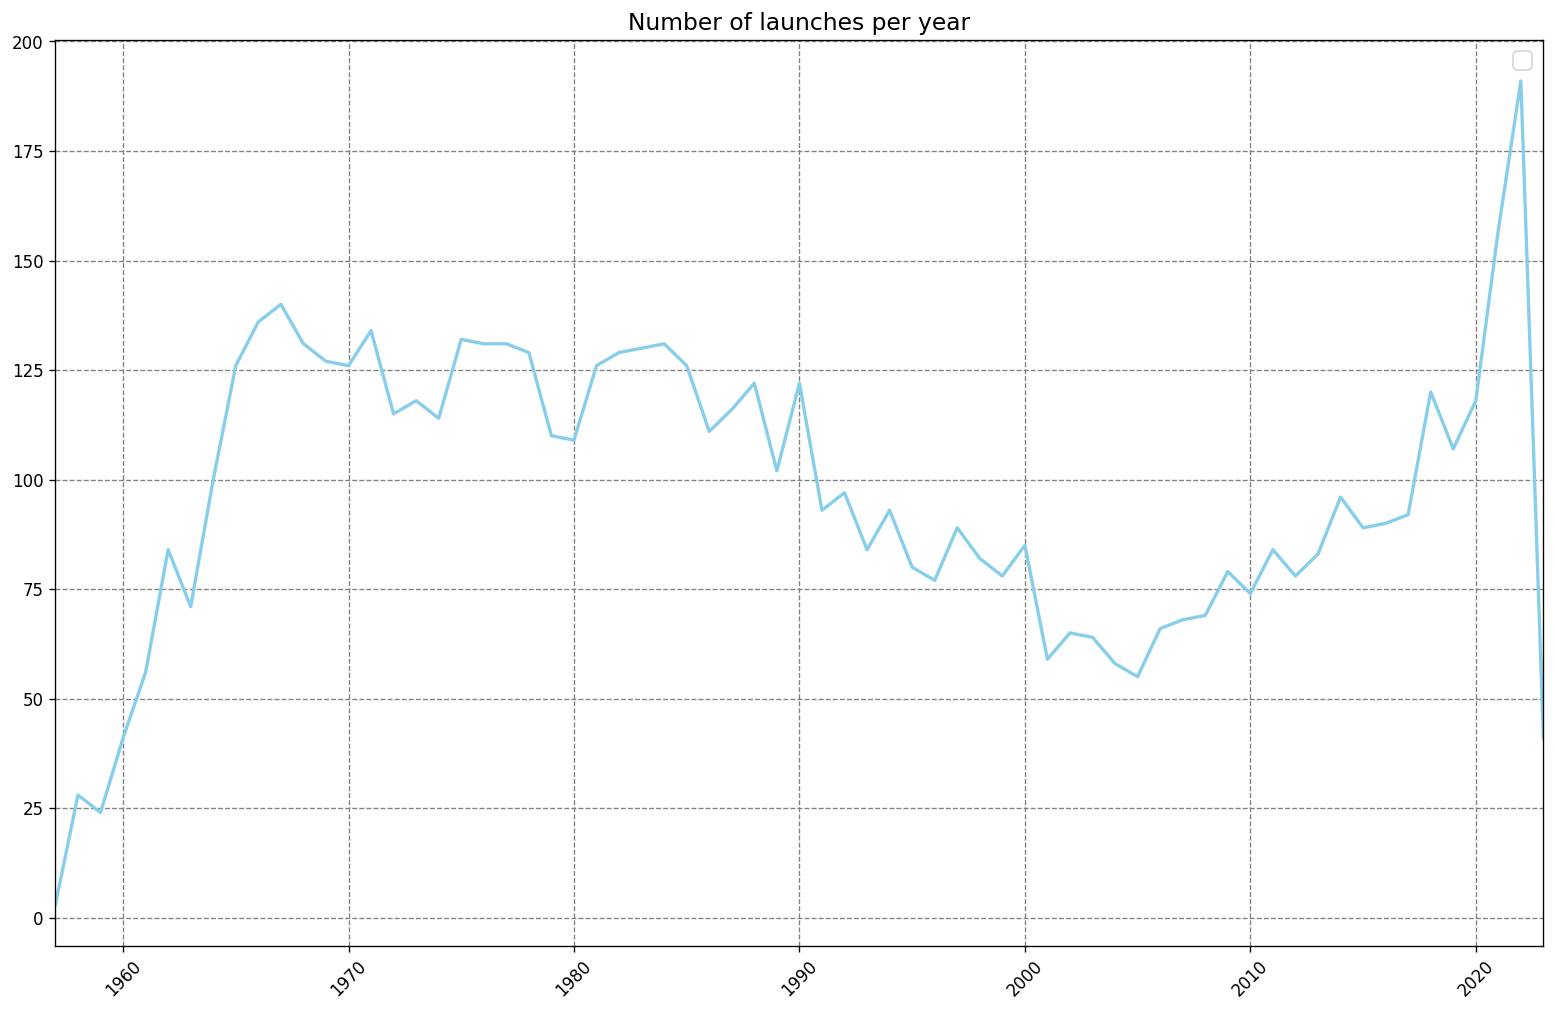

In [61]:
plt.figure(
    figsize = (16, 10),
    dpi = 120
)

plt.xticks(rotation=45)

plt.title('Number of launches per year', fontsize = 14)

plt.grid(
    ls = '--',
    color = 'grey'
)

plt.plot(
    launches_per_year.index,
    launches_per_year.values,
    lw = 2,
    color = 'skyblue'
)

plt.legend(
    fontsize=14
)

ax = plt.gca() # get current axis
ax.set_xlim(df2.Year.min(), df2.Year.max())




# Chart the Number of Launches Month-on-Month until the Present

Which month has seen the highest number of launches in all time? Superimpose a rolling average on the month on month time series chart. 

In [62]:
months_list = [month.month for month in df2.Datetime]
df2['Month'] = months_list
df2


,Unnamed: 0,Organisation,Location,Country,Datetime,Details,Status,Price,Mission_status,Country_clean,Year,Month
0,0,SpaceX,"SLC-40, Cape Canaveral SFS, Florida, USA",USA,2023-03-17 23:38:00+00:00,Falcon 9 Block 5 | SES-18 & SES-19,Active,67.00,Success,USA,2023,3
1,1,SpaceX,"SLC-4E, Vandenberg SFB, California, USA",USA,2023-03-17 19:26:00+00:00,Falcon 9 Block 5 | Starlink Group 2-8,Active,67.00,Success,USA,2023,3
2,2,CASC,"LC-2, Xichang Satellite Launch Center, China",China,2023-03-17 08:33:00+00:00,Long March 3B/E | Gaofen-13-02,Active,29.15,Success,CHN,2023,3
3,3,Rocket Lab,"Rocket Lab LC-2 (LP-0C), Wallops Flight Facili...",USA,2023-03-16 22:38:00+00:00,Electron/Curie | Stronger Together,Active,7.50,Success,USA,2023,3
4,4,CASC,"Site 95, Jiuquan Satellite Launch Center, China",China,2023-03-15 11:41:00+00:00,Long March 11 | Shiyan 19,Active,5.30,Success,CHN,2023,3
...,...,...,...,...,...,...,...,...,...,...,...,...
6487,6487,US Navy,"LC-18A, Cape Canaveral SFS, Florida, USA",USA,1958-02-05 07:33:00+00:00,Vanguard | Vanguard TV3BU,Retired,NaN,Failure,USA,1958,2
6488,6488,ABMA,"LC-26A, Cape Canaveral SFS, Florida, USA",USA,1958-02-01 03:47:00+00:00,Juno I | Explorer 1,Retired,NaN,Success,USA,1958,2
6489,6489,US Navy,"LC-18A, Cape Canaveral SFS, Florida, USA",USA,1957-12-06 16:44:00+00:00,Vanguard | Vanguard TV3,Retired,NaN,Failure,USA,1957,12
6490,6490,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",Kazakhstan,1957-11-03 02:30:00+00:00,Sputnik 8K71PS | Sputnik 2,Retired,NaN,Success,KAZ,1957,11


In [63]:
df_reshape = df2.groupby(['Year', 'Month']).agg({'Organisation':pd.Series.count})
df_reshape


Organisation
Year Month              
1957 10                1
     11                1
     12                1
1958 2                 2
     3                 3
...                  ...
2022 11               20
     12               18
2023 1                16
     2                12
     3                13

[782 rows x 1 columns]

In [64]:
df_pivot = df2.pivot_table(index='Year', columns='Month', values='Organisation', aggfunc='count')
df_pivot.fillna(0, inplace=True)
df_pivot

Month,1,2,3,4,5,6,7,8,9,10,11,12
Year,,,,,,,,,,,,
1957,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,1.00
1958,0.00,2.00,3.00,2.00,2.00,1.00,2.00,7.00,2.00,3.00,1.00,3.00
1959,1.00,2.00,1.00,2.00,0.00,4.00,1.00,4.00,4.00,2.00,3.00,0.00
1960,0.00,3.00,2.00,5.00,3.00,2.00,2.00,5.00,2.00,5.00,5.00,7.00
1961,2.00,8.00,5.00,4.00,2.00,4.00,5.00,6.00,4.00,5.00,7.00,4.00
...,...,...,...,...,...,...,...,...,...,...,...,...
2019,8.00,6.00,8.00,7.00,9.00,6.00,11.00,12.00,7.00,5.00,12.00,16.00
2020,8.00,9.00,8.00,5.00,9.00,7.00,14.00,7.00,10.00,10.00,13.00,18.00
2021,8.00,12.00,12.00,12.00,12.00,13.00,12.00,13.00,11.00,12.00,16.00,24.00


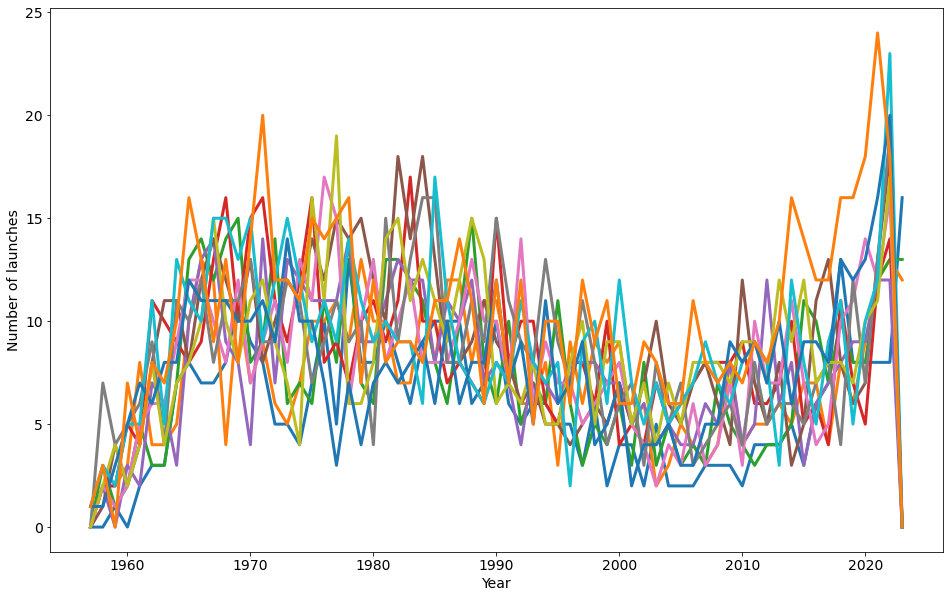

In [65]:
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("Year", fontsize=14)
plt.ylabel('Number of launches', fontsize=14)
for month in df_pivot.columns:
  plt.plot(
      df_pivot.index,
      df_pivot[month],
      linewidth=3,
      label=df_pivot[month].name
  )

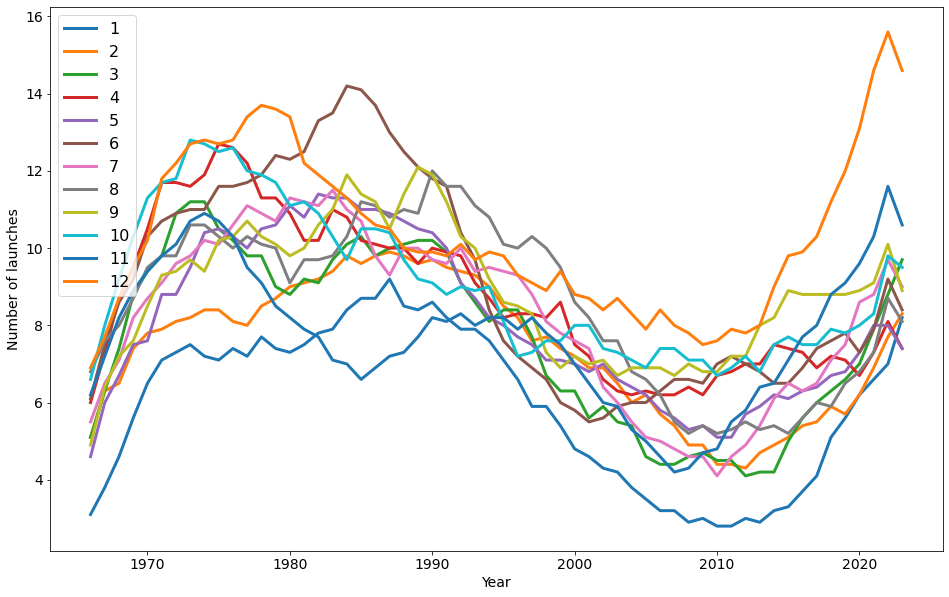

In [66]:
df_pivot_roll = df_pivot.rolling(window=10).mean()
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("Year", fontsize=14)
plt.ylabel('Number of launches', fontsize=14)
for month in df_pivot.columns:
  plt.plot(
      df_pivot_roll.index,
      df_pivot_roll[month],
      linewidth=3,
      label=df_pivot_roll[month].name
  )
  plt.legend(fontsize=16)

# Launches per Month: Which months are most popular and least popular for launches?

Some months have better weather than others. Which time of year seems to be best for space missions?

(1.0, 12.0)

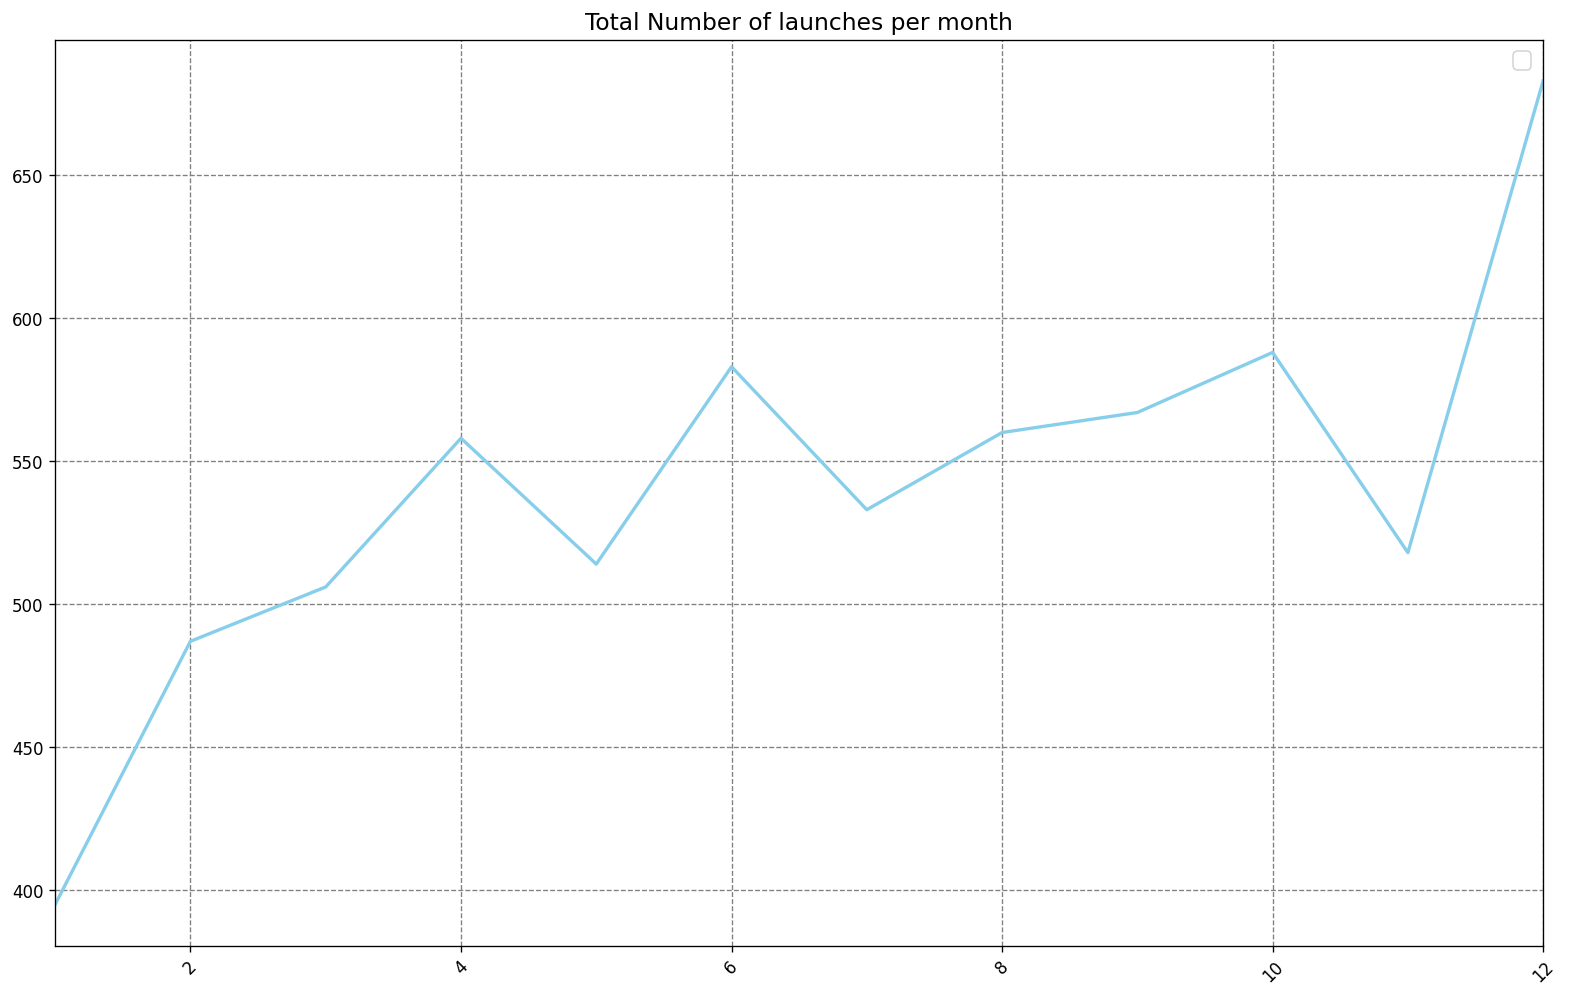

In [67]:
launches_per_month = df2.groupby('Month').agg({'Organisation':pd.Series.count})

plt.figure(
    figsize = (16, 10),
    dpi = 120
)

plt.xticks(rotation=45)

plt.title('Total Number of launches per month', fontsize = 14)

plt.grid(
    ls = '--',
    color = 'grey'
)

plt.plot(
    launches_per_month.index,
    launches_per_month.values,
    lw = 2,
    color = 'skyblue'
)

plt.legend(
    fontsize=14
)

ax = plt.gca() # get current axis
ax.set_xlim(1, 12)

# How has the Launch Price varied Over Time? 

Create a line chart that shows the average price of rocket launches over time. 

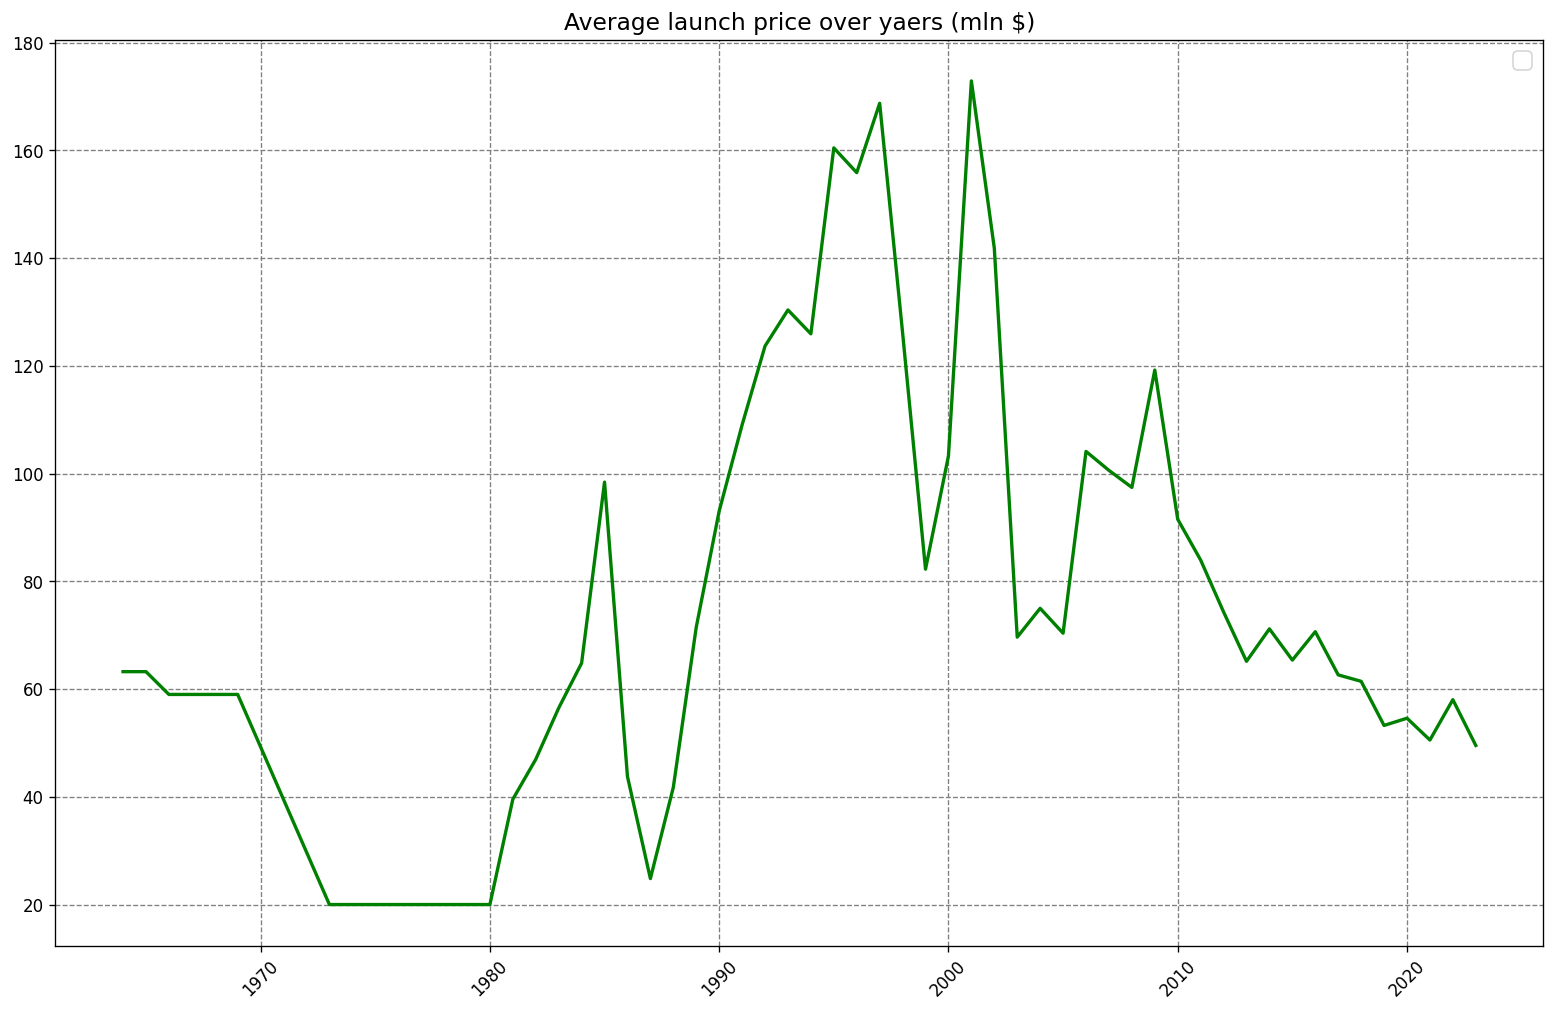

In [68]:
df2_no_na_new = df2.dropna()
price_per_year = df2_no_na_new.groupby('Year').agg({'Price': 'mean'})

plt.figure(
    figsize = (16, 10),
    dpi = 120
)

plt.xticks(rotation=45)

plt.title('Average launch price over yaers (mln $)', fontsize = 14)

plt.grid(
    ls = '--',
    color = 'grey'
)

plt.plot(
    price_per_year.index,
    price_per_year.values,
    lw = 2,
    color = 'green'
)

plt.legend(
    fontsize=14
)

# Chart the Number of Launches over Time by the Top 10 Organisations. 

How has the dominance of launches changed over time between the different players? 

In [69]:
top10_compabies_by_launches = df2.groupby('Organisation').agg({'Country':'count'}).sort_values('Country', ascending=False)[:10]


In [70]:
top10_compabies_list = [company for company in top10_compabies_by_launches.index]
top10_compabies_list

['RVSN USSR',
 'US Air Force',
 'CASC',
 'Roscosmos',
 'VKS RF',
 'Arianespace',
 'General Dynamics',
 'SpaceX',
 'NASA',
 'ULA']

In [71]:
top10_compabies_by_launches_by_years = df2[df2.Organisation.isin(top10_compabies_list)].groupby(['Organisation', 'Year'], as_index=False).agg({'Country':'count'})
top10_compabies_by_launches_by_years = top10_compabies_by_launches_by_years.pivot_table(index='Year', columns='Organisation', values='Country', aggfunc='sum')
top10_compabies_by_launches_by_years.fillna(0, inplace=True)
top10_compabies_by_launches_by_years = top10_compabies_by_launches_by_years.rolling(window=10).mean()

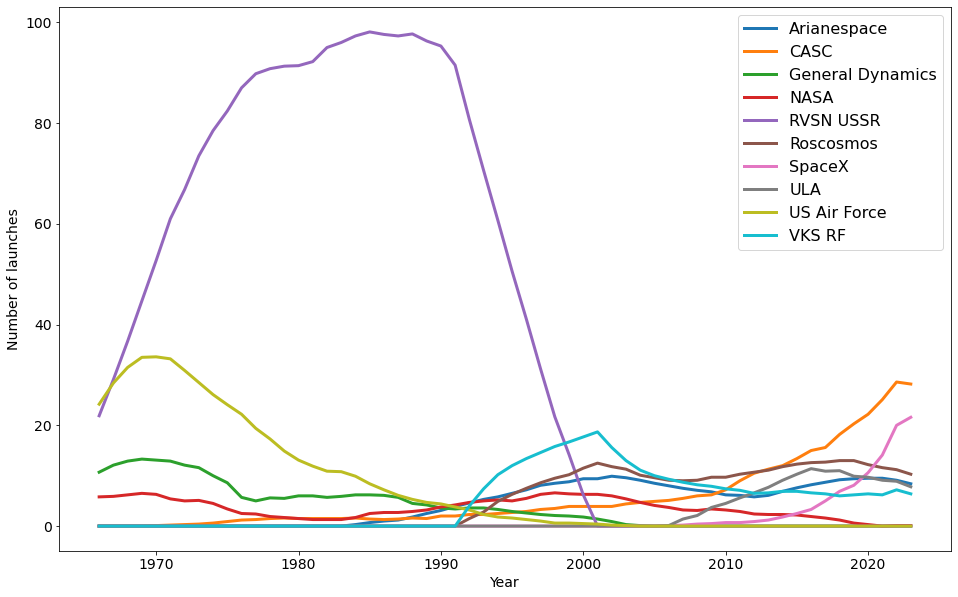

In [72]:
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("Year", fontsize=14)
plt.ylabel('Number of launches', fontsize=14)
for org in top10_compabies_by_launches_by_years.columns:
  plt.plot(
      top10_compabies_by_launches_by_years.index,
      top10_compabies_by_launches_by_years[org],
      linewidth=3,
      label=top10_compabies_by_launches_by_years[org].name
  )
  plt.legend(fontsize=16)

# Cold War Space Race: USA vs USSR

The cold war lasted from the start of the dataset up until 1991. 

In [73]:
cold_war_df = df2[df2.Year <= 1991]
cold_war_df = cold_war_df[cold_war_df.Country.isin(['Kazakhstan', 'USA', 'Russian Federation'])]
cold_war_df.replace('Kazakhstan', 'USSR', inplace=True)
cold_war_df.replace('Russian Federation', 'USSR', inplace=True)
cold_war_df.Country.value_counts()

USA     1075
USSR     983
Name: Country, dtype: int64

In [75]:
cold_war_df

,Unnamed: 0,Organisation,Location,Country,Datetime,Details,Status,Price,Mission_status,Country_clean,Year,Month
2769,2769,RVSN USSR,"Site 175/58, Baikonur Cosmodrome, Kazakhstan",USSR,1991-12-20 00:00:00+00:00,Rokot/Briz K | GVM Demo Flight,Retired,NaN,Success,KAZ,1991,12
2770,2770,RVSN USSR,"Site 81/23, Baikonur Cosmodrome, Kazakhstan",USSR,1991-12-19 11:41:00+00:00,Proton K/Block-DM-2 | Raduga 28,Retired,NaN,Success,KAZ,1991,12
2772,2772,RVSN USSR,"Site 31/6, Baikonur Cosmodrome, Kazakhstan",USSR,1991-12-17 11:00:00+00:00,Soyuz U | Cosmos 2174,Retired,20.00,Success,KAZ,1991,12
2774,2774,General Dynamics,"SLC-36B, Cape Canaveral SFS, Florida, USA",USA,1991-12-07 22:47:00+00:00,Atlas II | Eutelsat 2F3,Retired,NaN,Success,USA,1991,12
2775,2775,General Dynamics,"SLC-3W, Vandenberg SFB, California, USA",USA,1991-11-28 13:23:00+00:00,Atlas-E/F Star-37S-ISS | DMSP F-11,Retired,NaN,Success,USA,1991,11
...,...,...,...,...,...,...,...,...,...,...,...,...
6487,6487,US Navy,"LC-18A, Cape Canaveral SFS, Florida, USA",USA,1958-02-05 07:33:00+00:00,Vanguard | Vanguard TV3BU,Retired,NaN,Failure,USA,1958,2
6488,6488,ABMA,"LC-26A, Cape Canaveral SFS, Florida, USA",USA,1958-02-01 03:47:00+00:00,Juno I | Explorer 1,Retired,NaN,Success,USA,1958,2
6489,6489,US Navy,"LC-18A, Cape Canaveral SFS, Florida, USA",USA,1957-12-06 16:44:00+00:00,Vanguard | Vanguard TV3,Retired,NaN,Failure,USA,1957,12
6490,6490,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",USSR,1957-11-03 02:30:00+00:00,Sputnik 8K71PS | Sputnik 2,Retired,NaN,Success,KAZ,1957,11


## Create a Plotly Pie Chart comparing the total number of launches of the USSR and the USA

Hint: Remember to include former Soviet Republics like Kazakhstan when analysing the total number of launches. 

In [74]:
mission_status_chart = px.pie(
    labels = cold_war_df.Country.value_counts().index,
    values = cold_war_df.Country.value_counts().values,
    title = 'Total number of launches during Cold War',
    names = cold_war_df.Country.value_counts().index,
    color_discrete_sequence = px.colors.qualitative.Vivid
)

mission_status_chart.update_traces(
    textposition = 'outside',
    textinfo = 'percent+label'
)

/usr/local/lib/python3.9/dist-packages/plotly/express/_core.py:137: FutureWarning:

Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.



## Create a Chart that Shows the Total Number of Launches Year-On-Year by the Two Superpowers

In [78]:
# YoY_cold_war = cold_war_df.groupby(['Country', 'Year'], as_index=False).agg({'Organisation':'count'})
YoY_cold_war = cold_war_df.pivot_table(index='Year', columns='Country', values='Organisation', aggfunc='count')

In [86]:
YoY_cold_war

Country,USA,USSR
Year,,
1957,1,2
1958,23,5
1959,20,4
1960,32,9
1961,47,7
1962,62,14
1963,47,16
1964,64,28
1965,71,44


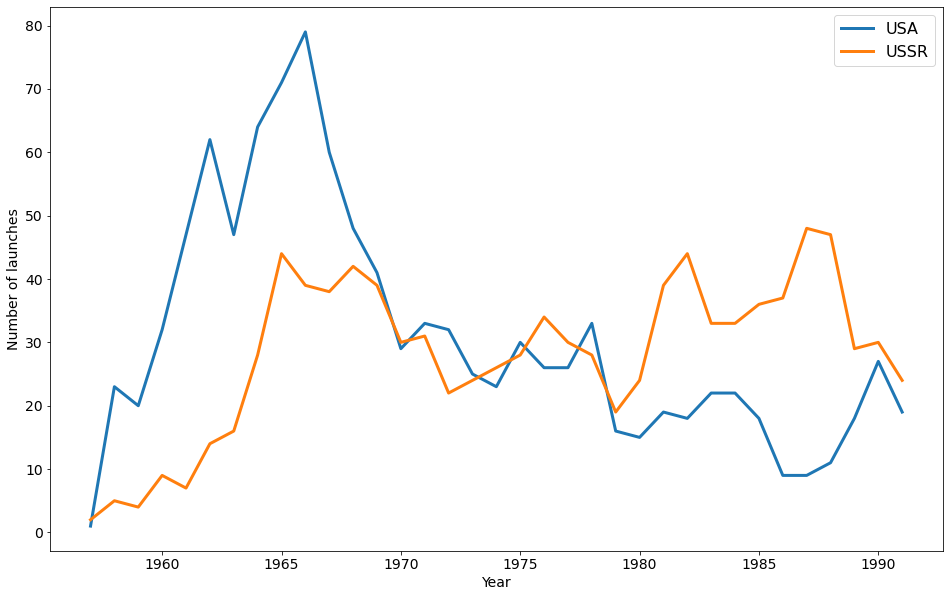

In [80]:
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("Year", fontsize=14)
plt.ylabel('Number of launches', fontsize=14)
for country in YoY_cold_war.columns:
  plt.plot(
      YoY_cold_war.index,
      YoY_cold_war[country],
      linewidth=3,
      label=YoY_cold_war[country].name
  )
  plt.legend(fontsize=16)

## Chart the Total Number of Mission Failures Year on Year.

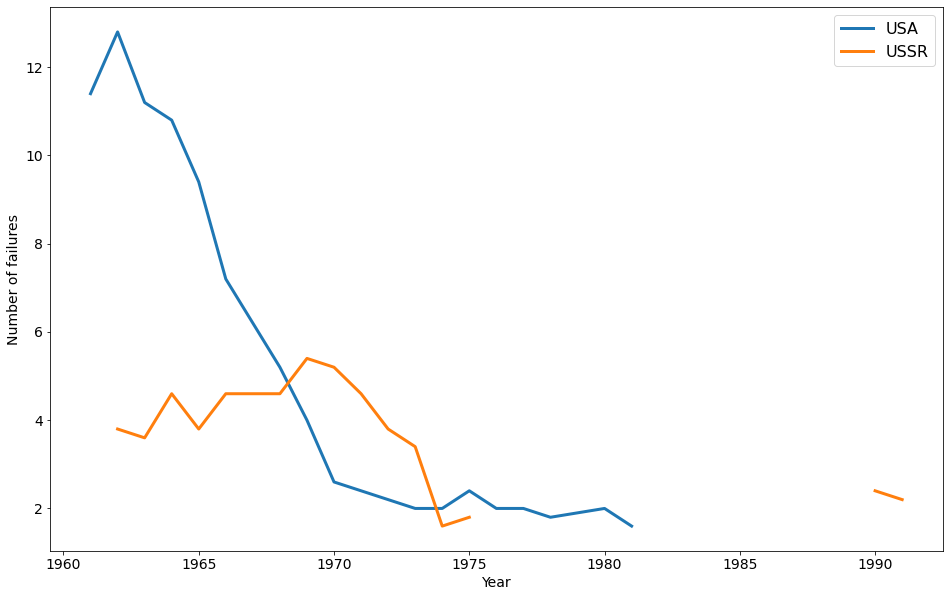

In [93]:
YoY_cold_war_failures = cold_war_df[cold_war_df.Mission_status == 'Failure'].pivot_table(index='Year', columns='Country', values='Organisation', aggfunc='count')
YoY_cold_war_failures_roll = cold_war_df[cold_war_df.Mission_status == 'Failure'].pivot_table(index='Year', columns='Country', values='Organisation', aggfunc='count').rolling(window=5).mean()
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("Year", fontsize=14)
plt.ylabel('Number of failures', fontsize=14)
for country in YoY_cold_war_failures_roll.columns:
  plt.plot(
      YoY_cold_war_failures_roll.index,
      YoY_cold_war_failures_roll[country],
      linewidth=3,
      label=YoY_cold_war_failures_roll[country].name
  )
  plt.legend(fontsize=16)

In [94]:
YoY_cold_war_failures

Country,USA,USSR
Year,,
1957,1.00,NaN
1958,16.00,4.00
1959,10.00,1.00
1960,15.00,6.00
1961,15.00,2.00
1962,8.00,6.00
1963,8.00,3.00
1964,8.00,6.00
1965,8.00,2.00


## Chart the Percentage of Failures over Time

Did failures go up or down over time? Did the countries get better at minimising risk and improving their chances of success over time? 

In [100]:
YoY_cold_war_failures_percent = pd.merge(YoY_cold_war, YoY_cold_war_failures, on='Year')
YoY_cold_war_failures_percent.fillna(0, inplace=True)
YoY_cold_war_failures_percent['Usa_fail_prc'] = (YoY_cold_war_failures_percent.USA_y / YoY_cold_war_failures_percent.USA_x)*100
YoY_cold_war_failures_percent['USSR_fail_prc'] = (YoY_cold_war_failures_percent.USSR_y / YoY_cold_war_failures_percent.USSR_x)*100
YoY_cold_war_failures_percent

Country,USA_x,USSR_x,USA_y,USSR_y,Usa_fail_prc,USSR_fail_prc
Year,,,,,,
1957,1,2,1.00,0.00,100.00,0.00
1958,23,5,16.00,4.00,69.57,80.00
1959,20,4,10.00,1.00,50.00,25.00
1960,32,9,15.00,6.00,46.88,66.67
1961,47,7,15.00,2.00,31.91,28.57
1962,62,14,8.00,6.00,12.90,42.86
1963,47,16,8.00,3.00,17.02,18.75
1964,64,28,8.00,6.00,12.50,21.43
1965,71,44,8.00,2.00,11.27,4.55


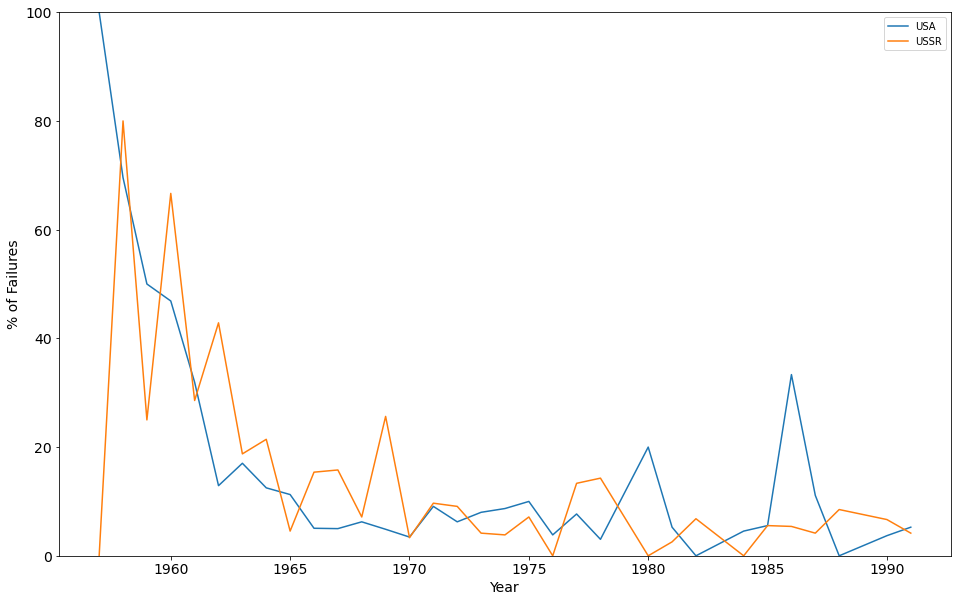

In [101]:
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Year', fontsize=14)
plt.ylabel('% of Failures', fontsize=14)
plt.ylim(0, 100)
plt.plot(YoY_cold_war_failures_percent.index, YoY_cold_war_failures_percent['Usa_fail_prc'], label='USA')
plt.plot(YoY_cold_war_failures_percent.index, YoY_cold_war_failures_percent['USSR_fail_prc'], label='USSR')
plt.legend()

# For Every Year Show which Country was in the Lead in terms of Total Number of Launches up to and including including 2020)

Do the results change if we only look at the number of successful launches? 

<ipython-input-108-f64ae893a5ad>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-108-f64ae893a5ad>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-108-f64ae893a5ad>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-108-f64ae893a5ad>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/

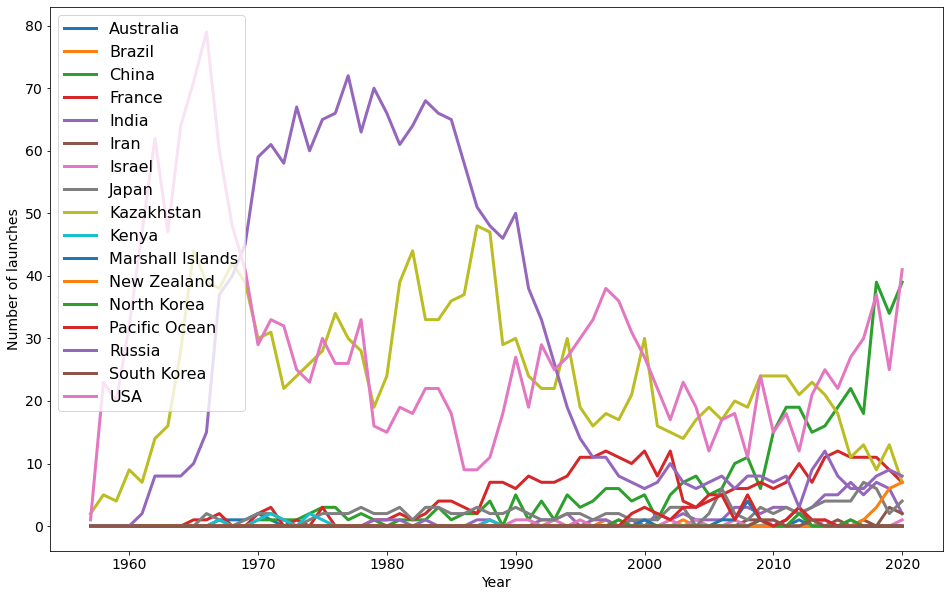

In [108]:
df2_update = df2[df2.Year <= 2020]
df2_update.Country.replace('Barents Sea', 'Russia', inplace=True)
df2_update.Country.replace('Yellow Sea', 'China', inplace=True)
df2_update.Country.replace('Pacific Missile Range Facility', 'USA', inplace=True)
df2_update.Country.replace('Gran Canaria', 'USA', inplace=True)
df2_update_country_launches = df2_update.pivot_table(index='Year', columns='Country', values='Organisation', aggfunc='count')
df2_update_country_launches.fillna(0, inplace=True)


plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("Year", fontsize=14)
plt.ylabel('Number of launches', fontsize=14)
for country in df2_update_country_launches.columns:
  plt.plot(
      df2_update_country_launches.index,
      df2_update_country_launches[country],
      linewidth=3,
      label=df2_update_country_launches[country].name
  )
  plt.legend(fontsize=16)

# Create a Year-on-Year Chart Showing the Organisation Doing the Most Number of Launches

Which organisation was dominant in the 1970s and 1980s? Which organisation was dominant in 2018, 2019 and 2020? 

<ipython-input-112-623cc1ce29ec>:1: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



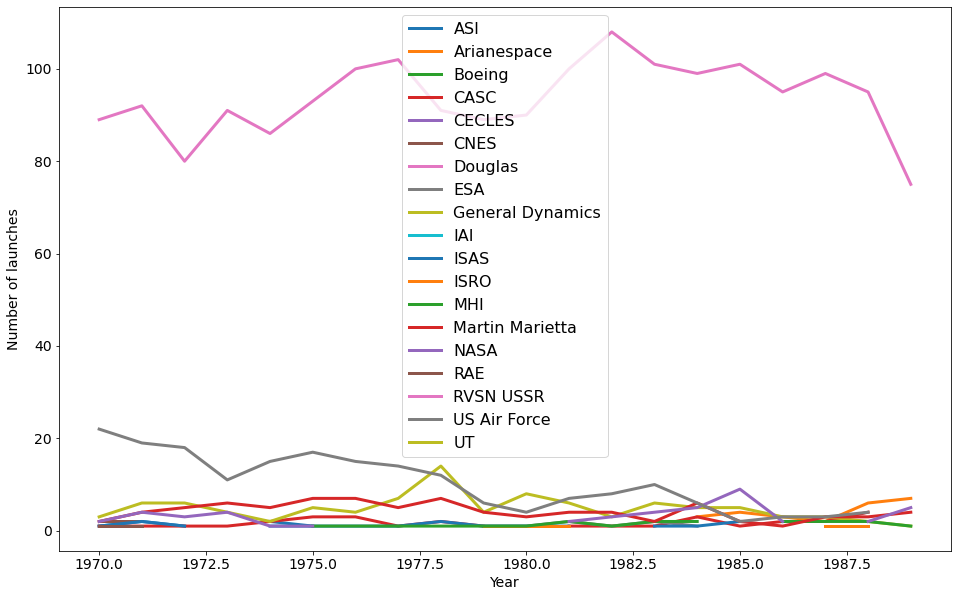

In [112]:
df2_update_new = df2_update[df2.Year.between(1970, 1989)]
df2_update_new_org = df2_update_new.pivot_table(index='Year', columns='Organisation', values='Country', aggfunc='count')

plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("Year", fontsize=14)
plt.ylabel('Number of launches', fontsize=14)
for org in df2_update_new_org.columns:
  plt.plot(
      df2_update_new_org.index,
      df2_update_new_org[org],
      linewidth=3,
      label=df2_update_new_org[org].name
  )
  plt.legend(fontsize=16)

<ipython-input-113-9208b7c7d32f>:1: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



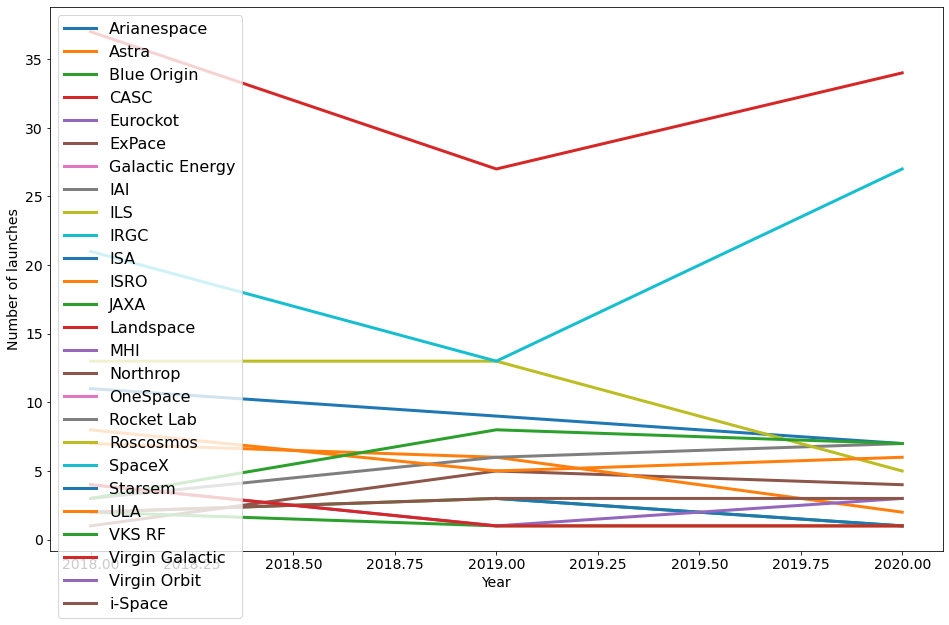

In [113]:
df2_update_new = df2_update[df2.Year.between(2018, 2020)]
df2_update_new_org = df2_update_new.pivot_table(index='Year', columns='Organisation', values='Country', aggfunc='count')

plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("Year", fontsize=14)
plt.ylabel('Number of launches', fontsize=14)
for org in df2_update_new_org.columns:
  plt.plot(
      df2_update_new_org.index,
      df2_update_new_org[org],
      linewidth=3,
      label=df2_update_new_org[org].name
  )
  plt.legend(fontsize=16)